<a href="https://colab.research.google.com/github/zzaeyun/ESAA23_1/blob/main/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_87to95_105to115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**04 모델 세부 설정**


In [2]:
import tensorflow as tf

mnist=tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test)=mnist.load_data()

print('train_set:', x_test.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
train_set: (10000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


###**4-1 초기값 설정**
- 레이어의 초기화 방법을 다르게 설정 가능. 디폴트는 Clorot Uniform 초기화 방법


In [3]:
dense=tf.keras.layers.Dense(256,activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

초기화 방법을 HeMormal로 변경
- kernel_initializer 매개변수에 설정

In [4]:
dense=tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
print(dense.get_config()['kernel_initializer'])

{'class_name': 'HeNormal', 'config': {'seed': None}}


케라스에서 지원하는 자주 사용되는 초기화 목록
- 'glorot_normal', 'glorot_uniform': 글로럿 초기화(Xavier 초기화)
- 'lecun_normal', 'lecun_uniform': Yann Lecun 초기화
- 'he_normal', 'he_uniform': He 초기화
- 'random_normal', 'random_uniform': 정규분포, 연속균등 분포 초기화

<br>

###**4-2 규제(Regularization)**
- 모델의 과대적합을 해소하기 위해 L1, L2 규제를 적용
- 텐서플로 케라스 레이어는 기본값으로 규제를 적용하지 않음

In [5]:
dense=tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'name': 'dense_2',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [7]:
#l1 규제 적용
dense=tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

#클래스 인스턴스 적용, alpha=0.1변경
regularizer=tf.keras.regularizers.l1(l1=0.1)
dense=tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}
{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}


###**4-3 드롭아웃(Dropout)**
딥러닝 모델이 층이 넓고 깊어질 때 (wide-and-deep) 모델은 훈련에 주어진 샘플을 과하게 적합하도록 학습하는 경향이 있음 : 과대적합
- 훈련할 때 만나지 못한 새로운 데이터에는 좋지 않은 예측력을 보임
- => 드롭아웃: 모델의 과대적합 문제를 해결하기 위해 제안된 아이디어

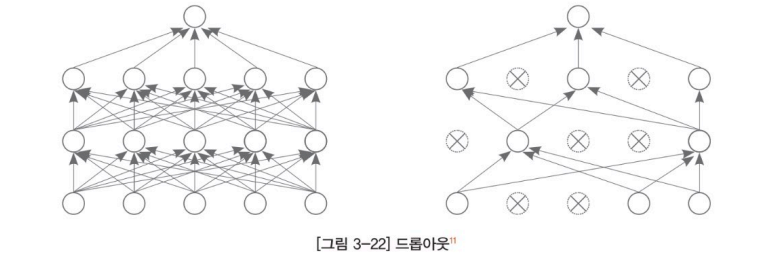

오른쪽 그림은 모든 노드가 연결되어 있지 않고 확률적으로 몇 개의 신호는 끊겨 있음
-  => 과대적합 방지(모델이 학습하는 가중치 파라미터 개수가 현저히 줄어들기 때문)


In [8]:
tf.keras.layers.Dropout(0.25)

###**4-4 배치 정규화(Batch Normalization)**
- 배치 정규화: 각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일을 정규화
    - 다음층으로 데이터가 전달되기 전에 스케일을 조정하기 때문에 보다 안정적인 훈련이 가능하며 성능이 크게 향상
    - 케라스에서 클래스함수로 지원

In [9]:
model_a=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [12]:
#model B: Dense + BatchNorm + ReLU
model_b=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(32),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                      

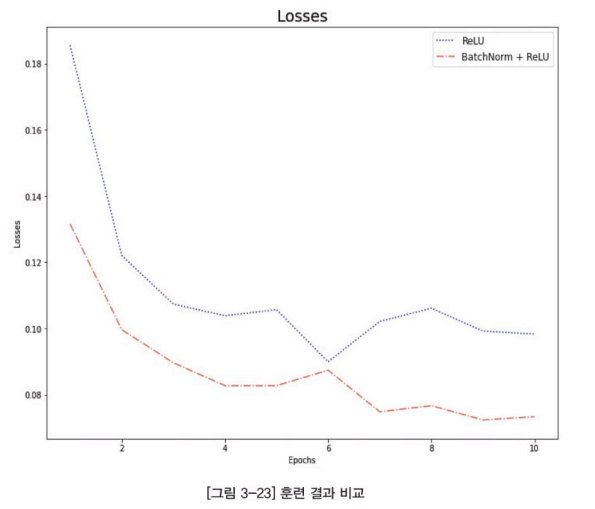

배치정규화만 추가해도 손실이 안정적이고 빠르게 수렴

###**4-5 활성화(activation)함수**
활성화 함수를 적용할 때, 다음과 같이 클래스 인스턴스로 선언하여 하이퍼파라미터 값을 변경하여 적용할 수 있다.

In [14]:
#LeakyReLU 기본
tf.keras.layers.LeakyReLU()

tf.keras.layers.LeakyReLU(alpha=0.2)

In [15]:
model_c=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(32),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_c.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_5 (Batc  (None, 32)               128       
 hNormalization)                                      

- model_a: Dense 레이어 + ReLU 활성화 함수
- model_b: Dense 레이어 + 배치 정규화
- model_c: Dense 레이어 + 배치 정규화 + LeakyReLU(0.2) 활성화 함수

    - 수렴 속도 확인

In [16]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_a=model_a.fit(x_train, y_train,
                      validation_data=(x_test, y_test),
                      epochs=10)

history_b=model_b.fit(x_train, y_train,
                      validation_data=(x_test, y_test),
                      epochs=10)

history_c=model_c.fit(x_train, y_train,
                      validation_data=(x_test, y_test),
                      epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5546 - accuracy: 0.6997 - val_loss: 0.5978 - val_accuracy: 0.8059
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4877 - accuracy: 0.8688 - val_loss: 0.3867 - val_accuracy: 0.8966
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3280 - accuracy: 0.9148 - val_loss: 0.3430 - val_accuracy: 0.9104
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2452 - accuracy: 0.9349 - val_loss: 0.2563 - val_accuracy: 0.9309
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1911 - accuracy: 0.9470 - val_loss: 0.2214 - val_accuracy: 0.9417
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1641 - accuracy: 0.9546 - val_loss: 0.1756 - val_accuracy: 0.9559
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1451 - accuracy: 0.9605 - val_loss: 0.1729 - val_accuracy:

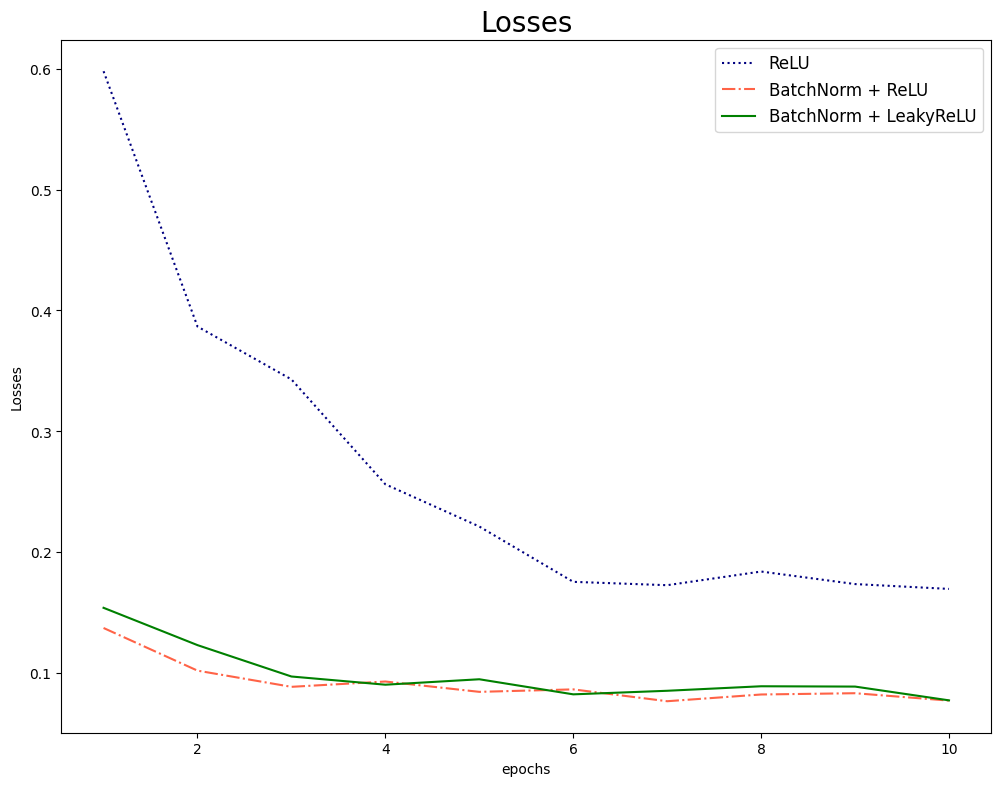

In [23]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,9))
plt.plot(np.arange(1,11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1,11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1,11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm + ReLU', 'BatchNorm + LeakyReLU'], fontsize=12)
plt.show()

##**06 모델 저장 및 불러오기**

###**6-1 모델을 파일로 저장**
- 훈련을 종료하여 가중치가 업데이트된 모델 인스터스를 저장 가능
- save() 메서드 사용
  1. .h5: HDF5 포맷: 대용량의 데이터를 저장하기 위한 파일 형식
  2. savedModel 포맷

In [26]:
model_c.save('h5-model.h5')

###**6-2 저장된 모델 복원**
tensorflow.keras.models.load_model() 메소드로 저장된 모델을 복원 가능
- 저장된 HDF5 파일 형식의 모델로 복원하여 summary()를 확인하면 모델 구조가 그대로 복원

In [27]:
h5_model=tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_5 (Batc  (None, 32)               128       
 hNormalization)                                      

복원한 모델을 검증하여 복원 확인

In [29]:
loss, acc=h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss: {loss: .5f}, acc:{acc:.5f}')

h5 model] loss:  0.07765, acc:0.97570


In [31]:
# SavedModel 포맷도 동일한 방식

model_c.save('saved-model')

saved_model=tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_5 (Batc  (None, 32)               128       
 hNormalization)                                      

In [32]:
# 모델 검증 비교

loss, acc=h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss: {loss: .5f}, acc:{acc:.5f}')

loss, acc=saved_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss: {loss: .5f}, acc:{acc:.5f}')

h5 model] loss:  0.07765, acc:0.97570
h5 model] loss:  0.07765, acc:0.97570


##**07 복잡한 모델 생성**
###**7-1 함수형 API(Functional API)**
- Functional API는 복잡한 구조의 모델을 정의 가능

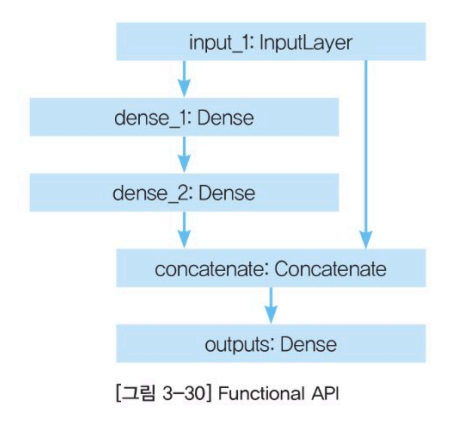

- 함수 입력 매개변수를 여러 개 갖는 다중 입력
- 함수의 return 값을 여러 개 갖는 다중 출력
- 같은 레벨에 여러 개의 층을 배치하여 입력과 출력을 공유
등등 다양한 구조 가능

<br>

- 기존에 Sequential API로 구현한 mnist 분류기 모델로 함수형 API를 동일하게 구현한 코드
- Input 레이어를 정의: 데이터의 입력 shape를 정의
- 레이어마다 반환되는 출력 값을 변수에 저장한 뒤 다음 레이어의 입력으로 연결

In [33]:
input_layer=tf.keras.Input(shape=(28,28), name='InputLayer')

x1=tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2=tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3=tf.keras.layers.Dense(64, activation='relu', name='Dense2')(x2)
x4=tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x3)

- 레이어마다 name 매개변수로 이름 부여 가능
- 체인 방식으로 연결한 수 tf.keras.Model()에 입력 레이어와 출력 레이어를 정의해 모델 생성

In [34]:
func_model=tf.keras.Model(inputs=input_layer, outputs=x4, name='FunctionalModel')

func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


summary로는 복잡한 구조를 갖는 모델의 구조도를 시각화하기 어렵다
- plot_model 모듈을 활용

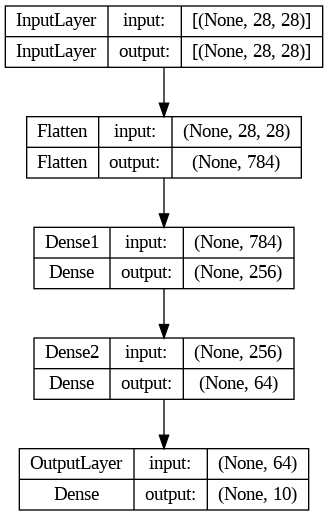

In [35]:
from tensorflow.keras.utils import plot_model

plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

- show_shapes=True: 데이터의 입출력 shape을 출력
- show_layer_names=Ture: 레이어의 이름 출력
- to_file 매개변수에 파일명을 입력하면 이미지 파일로 저장도 가능

<br>

- 함수형 API로 생성한 모델도 Sequential API로 생성한 모델과 동일한 방식으로 훈련
- 생성된 모델 인스턴스에 comopile() 메소드로 모델을 컴파일하고 fit() 메소드로 훈련
- 훈련이 완료된 뒤 evaluate() 메소드로 검증

In [36]:
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

func_model.fit(x_train, y_train, epochs=3)

loss, acc=func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1744 - accuracy: 0.7961
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3341 - accuracy: 0.9119
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2157 - accuracy: 0.9423
Functional Model] loss: 0.19892, acc: 0.94700


###**7-2 모델 서브클래싱(Model Subclassinf)**
- Model 클래스를 제공하고 이를 기반으로 딥러닝 모델 구현
- 이 클래스를 상속받아 직접 서브클래스로 딥러닝 모델을 만들 수 있다
  - 함수형 API로 생성한 모델과의 성능 차이는 없음

<br>

Model Subclassig으로 모델 인스턴스를 생성하기 위해서는 tf.keras.Model를 상속받아 생성하고자 하는 모델 클래스를 구현
- 모델의 \_\_init\_\_() 함수에 레이어를 정의하고 레이어의 하이퍼파라미터를 정의

In [37]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    #초기값 설정
    self.flatten=tf.keras.layers.Flatten()
    self.dense1=tf.keras.layers.Dense(256, activation='relu')
    self.dense2=tf.keras.layers.Dense(64, activation='relu')
    self.dense3=tf.keras.layers.Dense(10, activation='softmax')

  def call(self, x):
    x=self.flatten(x)
    x=self.dense1(x)
    x=self.dense2(x)
    x=self.dense3(x)
    return x

call(): 메소드 오버라이딩으로 구현
- fit() 메소드가 호출되어 훈련하는 경우 호출될 함수
- 모델의 입력부터 출력까지의 흐름, 순전파(forward propagation)를 정의하고 모든 레이어를 체인처럼 연결

In [38]:
mymodel=MyModel()

mymodel._name='subclass_model'
mymodel(tf.keras.layers.Input(shape=(28,28)))

mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         multiple                  0         
                                                                 
 dense_16 (Dense)            multiple                  200960    
                                                                 
 dense_17 (Dense)            multiple                  16448     
                                                                 
 dense_18 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


mymodel변수에 바로 summary()로 요약 출력은 불가능: input_shape이 정의되지 않아서
- mymodel에 Input 레이어와 함께 shape을 정의해주면 summary()로 모델의 요약 확인

In [39]:
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

mymodel.fit(x_train, y_train)

loss, acc=mymodel.evaluate(x_test,y_test, verbose=0)
print(f'Subclassing Model] loss: {loss:.5f}, acc: {acc:.5f}')

1875/1875 [==============================] - 7s 3ms/step - loss: 1.4114 - accuracy: 0.8148
Subclassing Model] loss: 0.48250, acc: 0.87270


동일한 메소드를 사용 가능하고 모델을 생성하는 방식에만 차이가 있음

###**7-3 서브클래싱 모델 파라미터를 활용한 생성**
- Model Subclassing으로 생성하는 장점은 생성자 파라미터로 모델 내부 레이어의 하이퍼 파라미터를 지정 가능

In [40]:
class MyModel(tf.keras.Model):
  def __init__(self, units, num_classes):
    super(MyModel, self).__init__()
    #초기값 설정
    self.flatten=tf.keras.layers.Flatten()
    self.dense1=tf.keras.layers.Dense(units, activation='relu')
    self.dense2=tf.keras.layers.Dense(units/4, activation='relu')
    self.dense3=tf.keras.layers.Dense(num_classes, activation='softmax')

  def call(self, x):
    x=self.flatten(x)
    x=self.dense1(x)
    x=self.dense2(x)
    x=self.dense3(x)
    return x

In [41]:
mymodel=MyModel(256,10)

mymodel(tf.keras.layers.Input(shape=(28,28)))

mymodel.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         multiple                  0         
                                                                 
 dense_19 (Dense)            multiple                  200960    
                                                                 
 dense_20 (Dense)            multiple                  16448     
                                                                 
 dense_21 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [42]:
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

mymodel.fit(x_train, y_train, epochs=3)

loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model w.parameters] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 1.1933 - accuracy: 0.8228
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3190 - accuracy: 0.9180
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2134 - accuracy: 0.9445
Subclassing Model w.parameters] loss: 0.23109, acc: 0.94610
